In [ ]:
import os
import random
import numpy as np
import pandas as pd
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.tag import pos_tag
import re

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

!pip3 install sentence-transformers
from sentence_transformers import SentenceTransformer
import gensim 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 78 kB 3.4 MB/s 
     |████████████████████████████████| 3.1 MB 10.8 MB/s 
     |████████████████████████████████| 3.3 MB 68.5 MB/s 
     |████████████████████████████████| 1.2 MB 67.2 MB/s 
     |████████████████████████████████| 61 kB 462 kB/s 
     |████████████████████████████████| 895 kB 57.2 MB/s 
     |████████████████████████████████| 596 kB 3.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip drive/MyDrive/aclImdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb/train/pos/9260_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._9260_7.txt  
  inflating: aclImdb/train/pos/1599_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._1599_7.txt  
  inflating: aclImdb/train/pos/2174_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2174_8.txt  
  inflating: aclImdb/train/pos/2309_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2309_9.txt  
  inflating: aclImdb/train/pos/12034_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._12034_10.txt  
  inflating: aclImdb/train/pos/11703_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._11703_9.txt  
  inflating: aclImdb/train/pos/5619_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._5619_9.txt  
  inflating: aclImdb/train/pos/2928_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2928_10.txt  
  inflating: aclImdb/train/pos/7096_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7096_10.txt  
  inflating: aclImdb/train/pos/793_9.txt  
  inf

In [ ]:
"""
READS Text File and return all of body as a string
"""


def read_input(input_path:str) -> str:
    file_data = open(input_path , 'r')
    
    return file_data.read()

def read_directory(input_dir:str):
  data = []
  #print(input_dir)
  files = [f for f in os.listdir(input_dir)]
  print(files)
  for x in range(100):
  #for f in files:
    #print("entered")
    #with open (input_dir+"/"+f, "r") as myfile:
    with open (input_dir+"/"+files[x], "r") as myfile:
      # print(myfile.read())
      data.append(myfile.read())

  df = pd.DataFrame(data)
  return df

train_pos = read_directory('/content/aclImdb/train/pos')
train_neg = read_directory('/content/aclImdb/train/neg')
test_pos = read_directory('/content/aclImdb/test/pos')
test_neg = read_directory('/content/aclImdb/test/neg')
#read_directory('/content/aclImdb/train/pos')

['953_10.txt', '5152_9.txt', '4181_9.txt', '58_9.txt', '2266_8.txt', '12229_9.txt', '3712_7.txt', '11328_10.txt', '11944_10.txt', '10816_10.txt', '8617_9.txt', '10363_9.txt', '3972_7.txt', '10700_8.txt', '4597_8.txt', '11653_10.txt', '11267_10.txt', '2453_8.txt', '9670_9.txt', '5198_7.txt', '5754_9.txt', '481_10.txt', '5399_8.txt', '9717_8.txt', '11965_8.txt', '1745_7.txt', '11746_9.txt', '11196_7.txt', '4352_10.txt', '11472_7.txt', '5868_8.txt', '9826_10.txt', '1326_10.txt', '366_9.txt', '12496_8.txt', '976_8.txt', '6591_8.txt', '6348_10.txt', '7751_7.txt', '11390_10.txt', '10885_7.txt', '12430_7.txt', '6118_10.txt', '1863_10.txt', '10909_10.txt', '4728_8.txt', '11670_7.txt', '7682_8.txt', '10263_10.txt', '8670_8.txt', '9462_9.txt', '10866_7.txt', '10492_10.txt', '11320_10.txt', '9165_10.txt', '1096_9.txt', '11441_10.txt', '2684_10.txt', '10506_10.txt', '11588_10.txt', '7298_7.txt', '2361_10.txt', '7483_10.txt', '8698_10.txt', '5887_7.txt', '6910_9.txt', '3574_10.txt', '10528_10.txt',

In [ ]:
train_pos

,0
0,Far richer in texture and character than even ...
1,"""Hitler, the rise of Evil"" is clearly produced..."
2,It's been so long since I've seen this movie (...
3,Caught the tail end of this movie channel surf...
4,It takes a little while to get used to Nick No...
...,...
95,Whoever says pokemon is stupid can die. This m...
96,I hated the first episode of this show ( 'Prot...
97,This is an evocative and idealized portrait of...
98,"Idiotic hack crooks, a babe, a safe, a plan an..."


In [ ]:
def mean(z): # used for BERT (word version) and Word2Vec
    return sum(itertools.chain(z))/len(z)

def cleanText(text):
    
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'re", " are", text)

    
    # Replace punctuations with space
    # save ! ? . for end of the sentence detection [,/():;']
    filters='"#$%&*+<=>@[\\]^_`{|}~\t\n'
    text = re.sub(r'\!+', '!', text)
    text = re.sub(r'\?+', '?', text)

    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    
    text = re.sub(r'\( *\)', ' ', text)

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)
    
    text = ''.join(text)

    return text

def embeddToBERT(text):
    sentences = re.split('!|\?|\.',text)
    sentences = list(filter(None, sentences)) 
    
    ## encoding the sentence
    result = bert_transformers.encode(sentences)
    #sys.stdout.write('\r'+"in")
    feature = [mean(x) for x in zip(*result)]
  
    return np.asarray(feature).reshape((768,1))



In [ ]:
embedding = 'BERT'
# for Word2Vec with stop words
train_pos['clean_text'] = train_pos[0].apply(cleanText)
train_neg['clean_text'] = train_neg[0].apply(cleanText)
test_pos['clean_text'] = test_pos[0].apply(cleanText)
test_neg['clean_text'] = test_neg[0].apply(cleanText)

In [ ]:
train_pos["label"]=1
train_neg["label"]=0
test_pos["label"]=1
test_neg["label"]=0

In [ ]:
frames = [train_pos, train_neg]
train_data = pd.concat(frames)
frames = [test_pos, test_neg]
test_data = pd.concat(frames)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data['clean_text'], train_data['label'], test_size=0.33, random_state=321)
X_train.head()

55    This movie is one of the most awful I have eve...
85    In one word: excruciating. I was advised to re...
3     ... or an audience. A quick recap.... So you h...
21    If derivative and predictable rape-revenge thr...
4     OK, I bought this film from Woolworths for my ...
Name: clean_text, dtype: object

In [ ]:
bert_transformers = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import sys
#bert_versio= 'SENTENCE'
c=0
bert_sentence_training_features=[]
for i in X_train:
    sys.stdout.write('\r'+str(c))
    bert_sentence_training_features.append(embeddToBERT(i))
    c=c+1

133

In [ ]:
feature = [x.T for x in bert_sentence_training_features]
bert_sentence_training_features = np.asarray(feature).reshape(len(X_train),768)

print(bert_sentence_training_features.shape)

(134, 768)


In [ ]:
# bert_sentence_test_features = X_test.apply(embeddToBERT)
#bert_version = 'SENTENCE'
c=0
bert_sentence_test_features=[]
for i in X_test:
    sys.stdout.write('\r'+str(c))
    bert_sentence_test_features.append(embeddToBERT(i))
    c=c+1

65

In [ ]:
feature = [x.T for x in bert_sentence_test_features]
bert_sentence_test_features = np.asarray(feature).reshape(len(X_test),768)
print(bert_sentence_test_features.shape)

(66, 768)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(bert_sentence_training_features, y_train)
y_pred=clf.predict(bert_sentence_test_features)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.83      0.88      0.86        34

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66



In [ ]:
#KNN Classifier
from sklearn.metrics import accuracy_score
#KNN Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
clf = knn.fit(bert_sentence_training_features, y_train)
predicted = clf.predict(bert_sentence_test_features)
print(predicted)
print('Confusion Matrix: ',confusion_matrix(y_test,predicted), sep = '')
print('Accuracy Score: ',accuracy_score(y_test,predicted)*100,'%',sep='\n')
print(classification_report(y_test, predicted))

[1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0]
Confusion Matrix: [[25  7]
 [ 4 30]]
Accuracy Score: 
83.33333333333334
%
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.81      0.88      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66



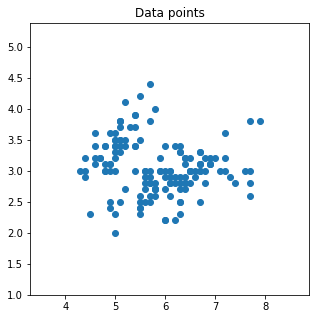

In [ ]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

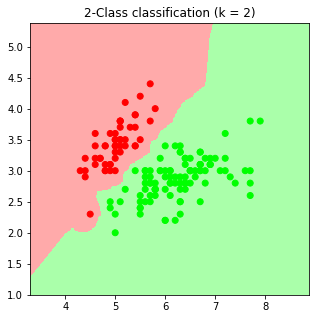

In [ ]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(3, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (2))
plt.show()
